# ASTR597B, Winter 2016: Big Data; Final
# Transiting Exoplanet Survey Satellite
## Import Simulated Data to Large Survey Database
### Andrew Lincowski

In [1]:
import os
import lsd
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

db = lsd.DB(os.environ["LSD_DB"])

In [2]:
# Inspect the simulated TESS data FITS file
data = Table.read('tess.fit')

# Print out the column names and types
for column in data.dtype.names:
    print "(%s, %s)" % (column.lower(), data[column].dtype)

(raj2000, >f8)
(dej2000, >f8)
(rp, >f4)
(per, >f8)
(s, >f4)
(k, >f4)
(r_, >f4)
(teff, >f4)
(vmag, >f4)
(imag, >f4)
(jmag, >f4)
(ksmag, >f4)
(dm, >f4)
(dil, >f4)
(logsigv, >f4)
(snr, >f8)
(mult, uint8)


In [3]:
# Create the corresponding YAML file
# Note that the TESS simulated data does not have a primary key
# This schema allows LSD to generate a primary key
! cat tess.yaml

# Schema for TESS table subset
filters: {complevel: 5, complib: blosc}
schema:
  common:
    primary_key: tessID
    spatial_keys: [raj2000, dej2000]
    columns:
    - [tessID, u8]
    - [raj2000, f8]
    - [dej2000, f8]
    - [rp, f4]
    - [per, f8]
    - [s, f4]
    - [k, f4]
    - [r_, f4]
    - [teff, f4]
  photometry:
    columns:
    - [vmag, f4]
    - [imag, f4]
    - [jmag, f4]
    - [ksmag, f4]
  statistics:
    columns:
    - [dm, f4]
    - [dil, f4]
    - [logsigv, f4]
    - [snr, f8]
    - [mult, u8]

In [4]:
#Create LSD table structure using tess schema
! lsd-admin create table --drop --schema=tess.yaml tess

Table 'tess' dropped.

-------- committing 20160308221755.059485 [tess] ---------
[tess] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.16 sec
[tess] Updating neighbors: Already up to date.
[tess] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.14 sec
[tess] Updating stats: [0 el.]>  0.00 sec
[tess] Marking tablets read-only...
----------- success 20160308221755.059485 [tess] ---------

Table 'tess' created.


In [5]:
#Import TESS data
! lsd-import fits tess tess.fit

Importing from 1 pieces:
  ===> Imported tess.fit                                                               [1/1, 100.00%] +   1984/1984         1984 (0/0 min.)
done

-------- committing 20160308221756.534579 [tess] ---------
[tess] Updating tablet catalog: [256 el.]::::::::::::::::::::>  1.04 sec
[tess] Updating neighbors: [1039 el.]::::::::::::::::::::[142 el.]++++++++++++++++++++>  2.51 sec
       Total 154 cached objects in 142 cells
[tess] Updating tablet catalog: [256 el.]::::::::::::::::::::>  1.09 sec
[tess] Updating stats: [1108 el.]::::::::::::::::::::>  0.08 sec [1108 el.]::::::::::::::::::::>  1.35 sec
[tess] Marking tablets read-only...
----------- success 20160308221756.534579 [tess] ---------



In [6]:
#Show TESS data structure from LSD
! lsd-admin desc table tess

Path:          /home/linc/lsd/lsddb/tess
Partitioning:  level=6
(t0, dt):      54335.000000, 1.000000 
Rows:          1984
Columns:       18
Primary key:   tessID
Spatial keys:  (raj2000, dej2000)
Aliases:       []
Column groups: ['common', 'photometry', 'statistics']
-------------------------------
Column group 'common':
              Column       Type
-------------------------------
              tessID         u8
             raj2000         f8
             dej2000         f8
                  rp         f4
                 per         f8
                   s         f4
                   k         f4
                  r_         f4
                teff         f4
-------------------------------
-------------------------------
Column group 'photometry':
              Column       Type
-------------------------------
                vmag         f4
                imag         f4
                jmag         f4
               ksmag         f4
-------------------------------
---------

## Although not asked to for this assignment, I would like to look at this data to make sure it makes sense. I will simply plot the RA, dec and look at the sky distribution of TESS data, which is an all-sky survey.

In [7]:
#Show number of objects
! lsd-footprint tess output.fits

 [1039 el.]::::::::::::::::::::>  1.55 sec
Objects: 1984.0


In [18]:
import os
import lsd

db = lsd.DB(os.environ["LSD_DB"])

In [19]:
#Query TESS data
qstr = 'SELECT raj2000, dej2000 FROM tess'
rows = db.query(qstr).fetch()

 [1039 el.]WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 8 cores.
::::::::::::::::::::>  1.55 sec


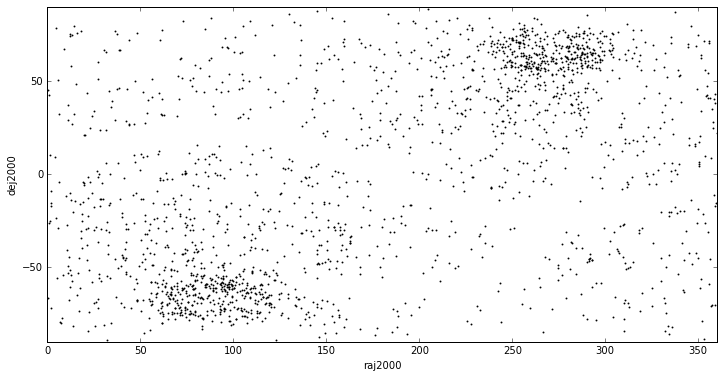

In [20]:
#Read the selected data into pandas dataframe and plot
import pandas as pd

data = pd.DataFrame(rows.as_ndarray())
data.plot(kind='scatter', x='raj2000', y='dej2000', s=0.8, figsize=(12, 6), xlim=[0,360], ylim=[-90,90])

We can see here that that +- 6 deg from the ecliptic is missing, because TESS does not cover that. And we see the "poles", where TESS has continuous 1-yr coverage.